In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("style.mplstyle")

def make_heatmap(ax, data, label):
    sns.heatmap(
        data,
        cmap="Blues",
        cbar=False,
        ax=ax,
        annot=True,
        fmt=".2f",
        square=True,
    )
    ax.set_aspect("equal")
    for text in ax.texts:
        if float(text.get_text()) < 0.01:
            text.set_text("")
            text.set_color("white")

    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1)

    ax.xaxis.set_tick_params(rotation=0)
    ax.yaxis.set_tick_params(rotation=0)
    ax.set_xlabel(f"{label} Classification")
    ax.set_ylabel("")

    return

In [2]:
df = pd.read_parquet("data/nsa_cloudy_predictions.parquet")
df.head()

cnn_dropout  cnn      rf     mlp cloud_phase
time                height                                             
2021-01-01 00:57:00 0.16           ice  ice     ice     ice         ice
                    0.19           ice  ice     ice     ice         ice
                    0.22           ice  ice     ice     ice         ice
                    0.25           ice  ice  liquid     ice         ice
2021-01-01 00:57:30 0.16           ice  ice     ice  liquid         ice

In [3]:
cnn = pd.crosstab(df["cloud_phase"], df["cnn"], normalize="columns")
dropout = pd.crosstab(df["cloud_phase"], df["cnn_dropout"], normalize="columns")
rf = pd.crosstab(df["cloud_phase"], df["rf"], normalize="columns")
mlp = pd.crosstab(df["cloud_phase"], df["mlp"], normalize="columns")


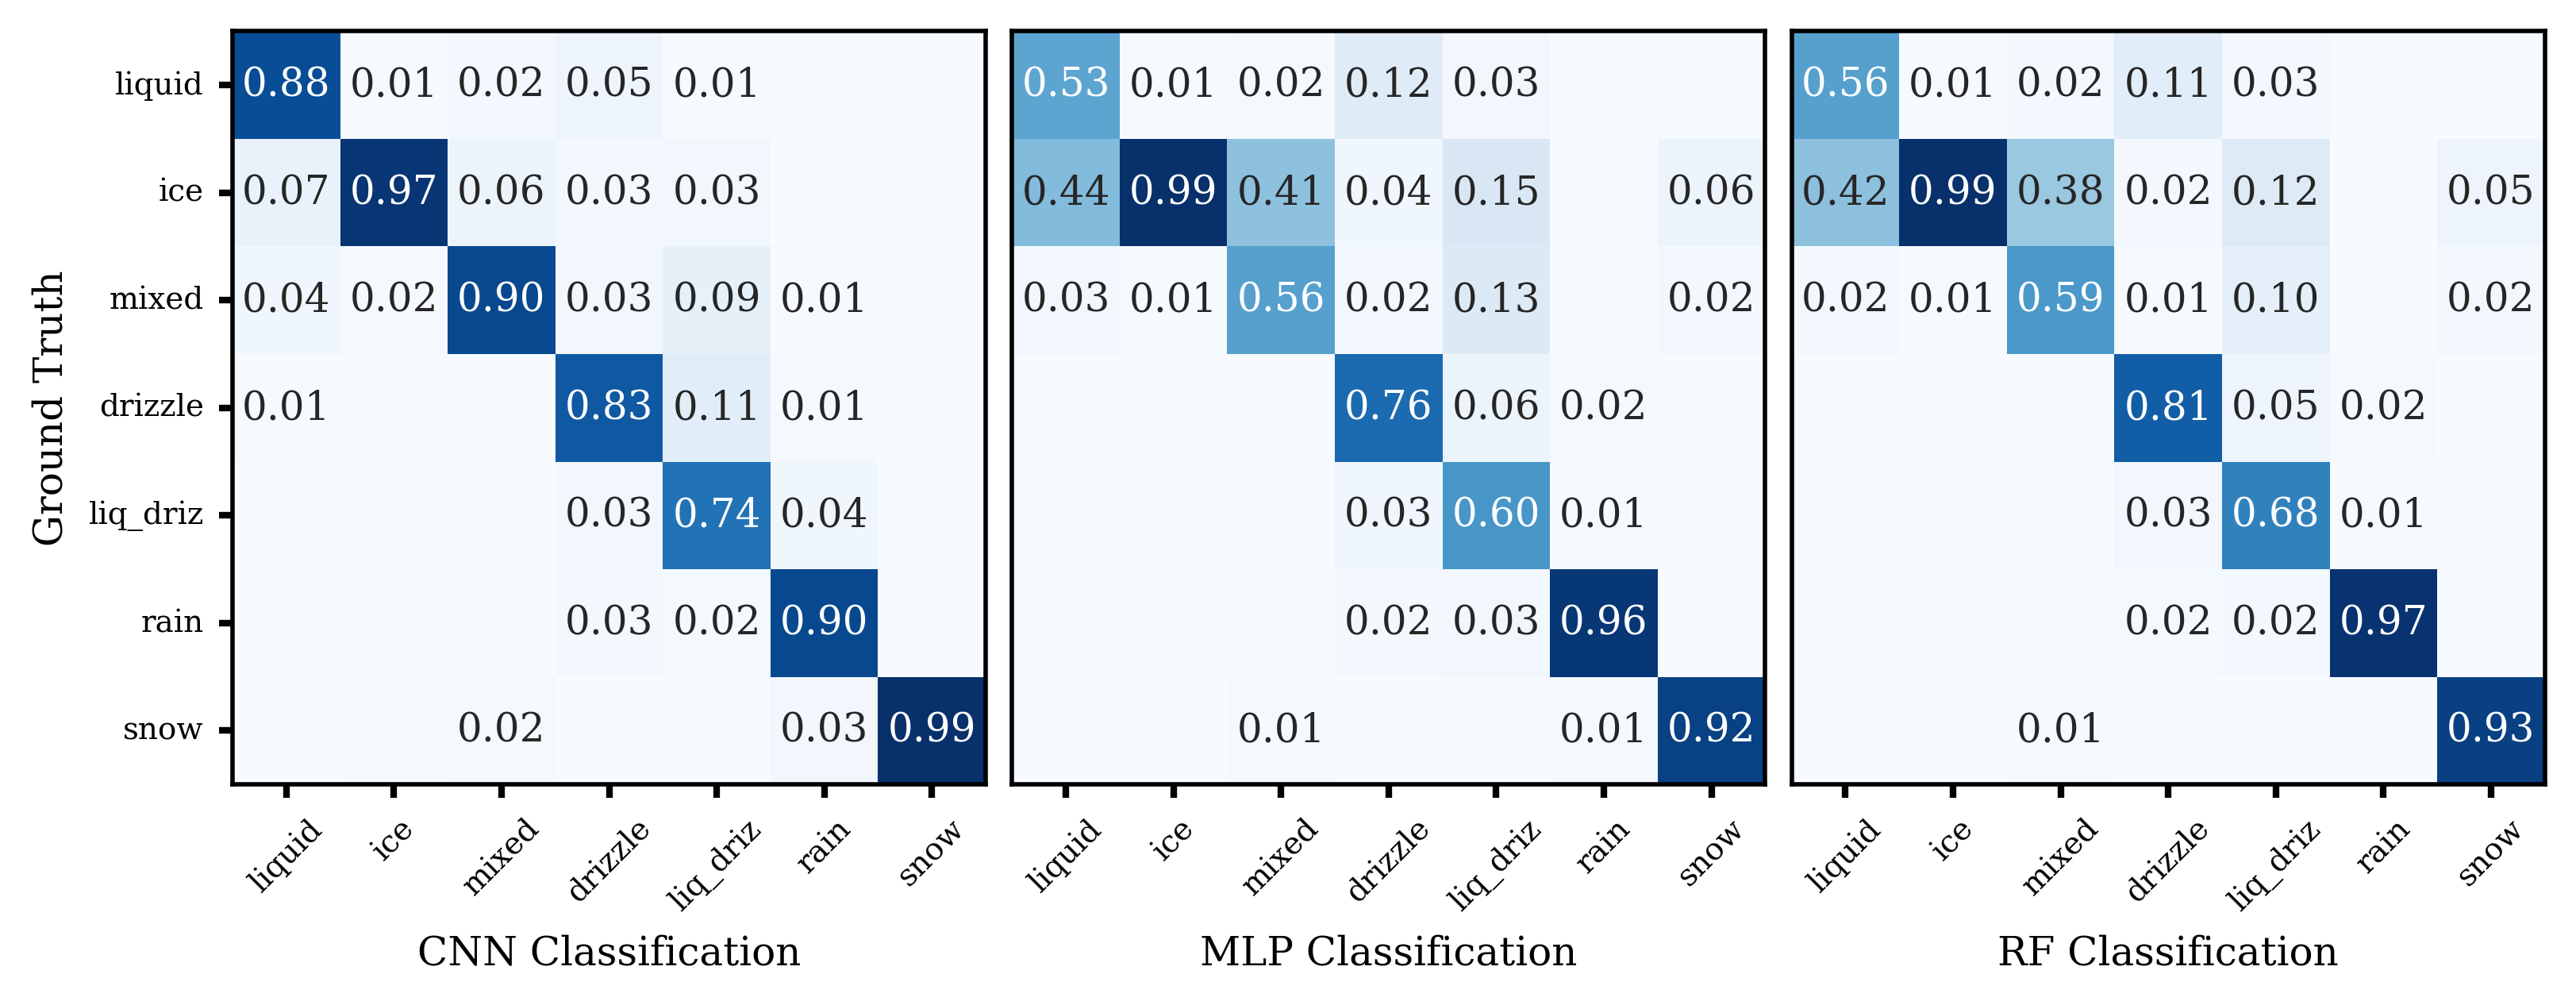

In [13]:

fig, axs = plt.subplots(
    figsize=(8, 6),
    ncols=3,
    # sharey=True,
    layout="constrained",
)

make_heatmap(axs[0], data=cnn, label="CNN")
make_heatmap(axs[1], data=mlp, label="MLP")
make_heatmap(axs[2], data=rf, label="RF")

for ax in axs.flat:
    ax.xaxis.set_tick_params(rotation=45)
axs[1].yaxis.set_ticks([])
axs[2].yaxis.set_ticks([])

axs[0].set_ylabel("Ground Truth")

fig.savefig("figures/nsa_confusion.png")

In [14]:
# ANX Results
anx_df = pd.read_parquet("data/anx_cloudy_predictions.parquet")

normalize = "columns"
anx_cnn = pd.crosstab(anx_df["cloud_phase"], anx_df["cnn"], normalize=normalize)
anx_dropout = pd.crosstab(anx_df["cloud_phase"], anx_df["cnn_dropout"], normalize=normalize)
anx_rf = pd.crosstab(anx_df["cloud_phase"], anx_df["rf"], normalize=normalize)
anx_mlp = pd.crosstab(anx_df["cloud_phase"], anx_df["mlp"], normalize=normalize)

Text(0.5, 1.0, 'ANX Cloud Phase Predictions')

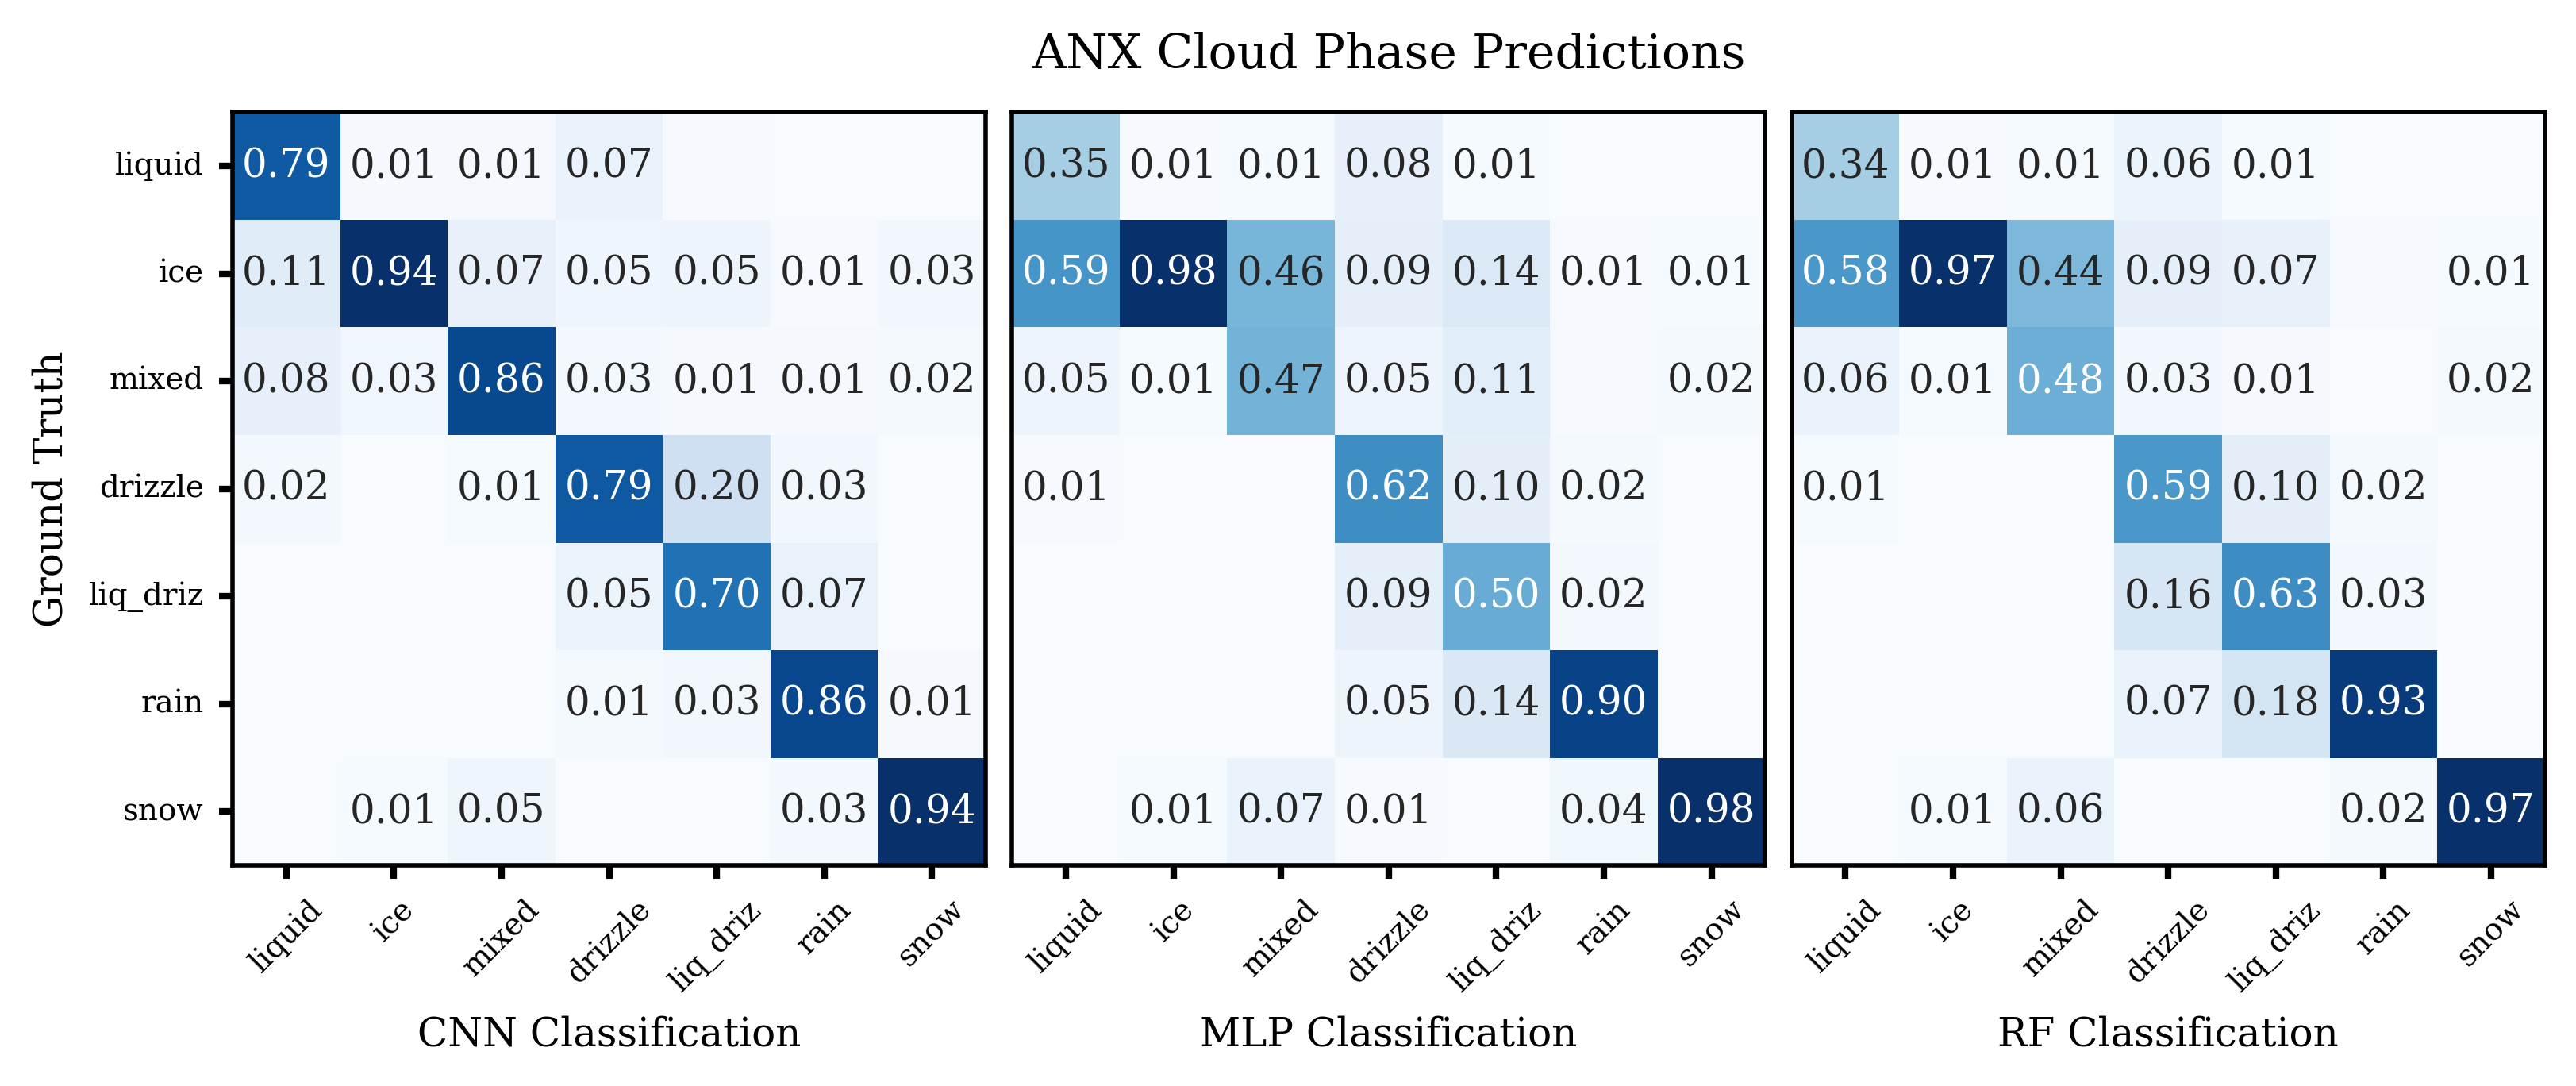

In [ ]:
fig, axs = plt.subplots(
    figsize=(8, 6),
    ncols=3,
    # sharey=True,
    layout="constrained",
)

make_heatmap(axs[0], data=anx_cnn, label="CNN")
make_heatmap(axs[1], data=anx_mlp, label="MLP")
make_heatmap(axs[2], data=anx_rf, label="RF")

for ax in axs.flat:
    ax.xaxis.set_tick_params(rotation=45)
axs[1].yaxis.set_ticks([])
axs[2].yaxis.set_ticks([])

axs[0].set_ylabel("Ground Truth")

axs[1].set_title("ANX Cloud Phase Predictions", pad=10)

fig.savefig("figures/anx_confusion.png")